# Use deep learning to determine whether MRI images show a brain tumor

Images from https://www.kaggle.com/navoneel/brain-mri-images-for-brain-tumor-detection 

In [23]:
#libraries and load data
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

#filepath of images
filepath = './Tumor_Images/brain_tumor_dataset'

img_height = 200
img_width = 200
batch_size = 10

#there are not so many images in the dataset, so to avoid overfitting, we'll use the ImageDataGenerator below that will
#randomly apply distortions to the images
train_datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=30,
                             width_shift_range=0.02,
                             height_shift_range=0.02,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             vertical_flip=True,
                             validation_split=0.2)

train_generator = train_datagen.flow_from_directory(filepath,
                                                    target_size=(img_height, img_width),  # this resizes all images to 200x200
                                                    batch_size=batch_size,
                                                    class_mode='binary',
                                                    subset = 'training')

validation_generator = train_datagen.flow_from_directory(filepath,
                                                        target_size=(img_height, img_width),
                                                        batch_size=batch_size,
                                                        class_mode='binary',
                                                        subset = 'validation')
                                                        

Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


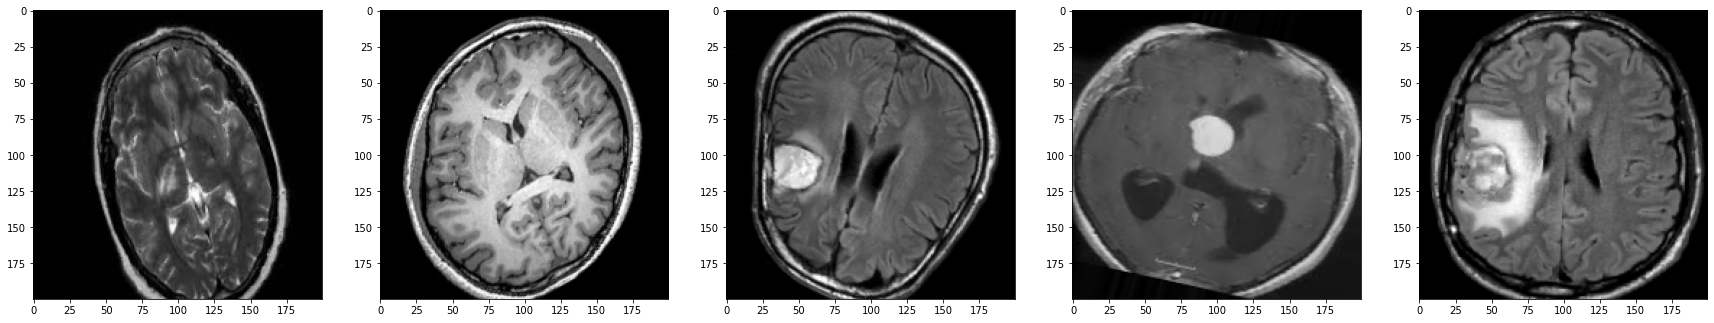

In [21]:
#print example images
X, y = train_generator.next()

def print5(images):
    fig = plt.figure(figsize=(30,10))
    for i in range(5):
        fig.add_subplot(151+i)
        plt.imshow(images[i],cmap=plt.get_cmap('gray'));

print5(X)

## Modeling and analysis

In [31]:
#the below isn't getting good results. Need to refine

#generate model
model = Sequential([
    Flatten(), #reshapes image
    Dense(32, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(2, activation = 'sigmoid')
])

#compile model.
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#fit model
model.fit(x=X, y=y, batch_size=batch_size, epochs=30, validation_split = .2, verbose=2);

Epoch 1/30
1/1 - 0s - loss: 0.8771 - accuracy: 0.3750 - val_loss: 2.5277 - val_accuracy: 0.0000e+00 - 316ms/epoch - 316ms/step
Epoch 2/30
1/1 - 0s - loss: 1.8674 - accuracy: 0.6250 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 35ms/epoch - 35ms/step
Epoch 3/30
1/1 - 0s - loss: 9.0860 - accuracy: 0.6250 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 37ms/epoch - 37ms/step
Epoch 4/30
1/1 - 0s - loss: 4.7019 - accuracy: 0.6250 - val_loss: 1.5090 - val_accuracy: 0.5000 - 34ms/epoch - 34ms/step
Epoch 5/30
1/1 - 0s - loss: 0.5138 - accuracy: 0.7500 - val_loss: 4.9556 - val_accuracy: 0.5000 - 33ms/epoch - 33ms/step
Epoch 6/30
1/1 - 0s - loss: 1.1549 - accuracy: 0.6250 - val_loss: 1.7485e-04 - val_accuracy: 1.0000 - 36ms/epoch - 36ms/step
Epoch 7/30
1/1 - 0s - loss: 4.7132e-04 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 35ms/epoch - 35ms/step
Epoch 8/30
1/1 - 0s - loss: 0.2350 - accuracy: 0.8750 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 36ms/epoch - 36ms/step
Ep